# 5. Hledání kořenů rovnice
## Zadání:
Vyhledávání hodnot, při kterých dosáhne zkoumaný signál vybrané hodnoty je důležitou součástí analýzy časových řad. Pro tento účel existuje spousta zajímavých metod. Jeden typ metod se nazývá ohraničené (například metoda půlení intervalu), při kterých je zaručeno nalezení kořenu avšak metody typicky konvergují pomalu. Druhý typ metod se nazývá neohraničené, které konvergují rychle, avšak svojí povahou nemusí nalézt řešení (metody využívající derivace). Vaším úkolem je vybrat tři různorodé funkce (například polynomiální, exponenciální/logaritmickou, harmonickou se směrnicí, aj.), které mají alespoň jeden kořen a nalézt ho jednou uzavřenou a jednou otevřenou metodou. Porovnejte časovou náročnost nalezení kořene a přesnost nalezení. 

## Rešení:

In [65]:
from matplotlib.pyplot import plot, axhline, show, title
from utils.math_derivate_utils import central_derivate
from utils.math_calculation_utils import exec_time
from numpy import linspace, vectorize
from math import exp, sin

In [66]:
def plot_result(fx, a0, b0, x_fx, plot_title):
    x = x_fx(fx, a0, b0)
    print("nuloví bod: x =", x)
    title(plot_title)
    plot(x, fx(x), "bo")                                             
    plot(linspace(a0, b0, 100), fx(linspace(a0, b0, 100)), "r")
    axhline(y=0)
    show()

## Metody Výpočtu

In [67]:
def bisection(f, a0, b0, eps=1E-10):
    a, b = a0, b0
    while b - a > 2*eps:
        x = (a + b)/2
        if f(a)*f(x) < 0:
            b = x
        else:
            a = x
    return x

In [68]:
def newton(f, a0, b0, delta=1E-10):
    a, b = a0, b0
    xnew = (a+b)/2
    xold = a
    while abs(xnew - xold) > delta:
        xold = xnew
        xnew = xold - f(xold)/central_derivate(f, xold, 1E-10)
    return xnew

## Příklady

nuloví bod: x = -0.9999999999417923


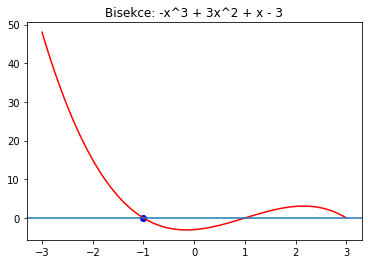

nuloví bod: x = 3.0000000000000004


In [69]:
func = vectorize(lambda x: -x**3 + 3*x**2 + x -3)
a, b = (-3, 3)

plot_result(func, a, b, bisection, "Bisekce: -x^3 + 3x^2 + x - 3")
plot_result(func, a, b, newton, "Newton: -x^3 + 3x^2 + x - 3")

nuloví bod: x = -0.23007594735827297


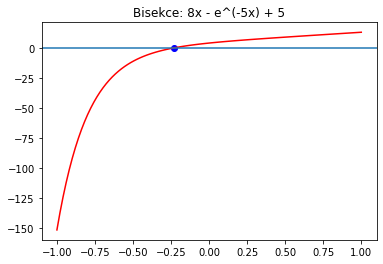

nuloví bod: x = -0.23007594742834195


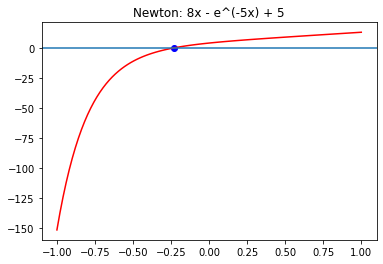

In [70]:
func = vectorize(lambda x: 8*x - exp(-5*x) + 5)
a, b = (-1, 1)

plot_result(func, a, b, bisection, "Bisekce: 8x - e^(-5x) + 5")
plot_result(func, a, b, newton, "Newton: 8x - e^(-5x) + 5")

In [73]:
func = vectorize(lambda x: sin(2*x+2))
a, b = (-8, 8)

plot_result(func, a, b, bisection, "Bisekce: sin(2x+2)")
plot_result(func, a, b, newton, "Newton: sin(2x+2)")

nuloví bod: x = -7.283185307285748


nuloví bod: x = 0.5707963267948967
